## Pandasql

In [ ]:
# ! pip install pandasql

In [1]:
import pandas as pd
import pandasql as ps
from pandasql import sqldf

def pysqldf0(q):
    return sqldf(q, globals())

pysqldf = lambda q: sqldf(q, globals())

iris = pd.read_csv('/class/Day3-Pandas/iris-data-index-column.csv', index_col=0, header=0)
display(iris)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
d1,5.1,3.5,1.4,0.2,Iris-setosa
a1,4.9,3.0,1.4,0.2,Iris-setosa
d2,7.0,3.2,4.7,1.4,Iris-versicolor
a2,6.4,3.2,4.5,1.5,Iris-versicolor
d3,6.3,3.3,6.0,2.5,Iris-virginica
a3,5.8,2.7,5.1,1.9,Iris-virginica


In [4]:
query = """
select upper(Class) as Class, Sepal_Length * 10 as S_Length
, Sepal_Width / 10 as S_Width 
from iris
where class = 'Iris-setosa'
order by S_Width
"""

iris2 = pysqldf(query)
display(iris2)

,Class,S_Length,S_Width
0,IRIS-SETOSA,49.0,0.30
1,IRIS-SETOSA,51.0,0.35


## LAB 1: ## 

### There are also some built-in sample datasets that can be used to play around with in pandasql

#### 1.	Use the meat DataFrame below, and find how many records have a null value for the broilers field 
#### 2.	Try to do the same using standard pandas commands

<br>
<details><summary>Click for <b>hint</b></summary>
<p>
For pandasql, use the name of the variable as a table name in the FROM clause
<br>
Use SQL SELECT COUNT and a null test in the WHERE clause
<br>
For standard pandas, get the Series for the broilers column using [] notation
<br>
Use isnull() method to get a Series of True/False for the rows that are null
<br>
Use that to get just the rows from the DataFrame that are null
<br>
Use the len() function to see how many there are
<br>
<br>
</p>
</details>


<details><summary>Click for <b>code</b></summary>
<p>

```python
import pandasql as ps
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

meat = ps.load_meat()
#display(meat)

print(pysqldf('select count(*) from meat where broilers is null'))

print(len(meat['broilers'][meat['broilers'].isnull()]))

```
</p>
</details>

In [29]:
d = {'veal':10, 'beef':20}
#print(d['veal'])

#print(d.veal)

AttributeError: 'dict' object has no attribute 'veal'

In [37]:
import pandasql as ps
print(dir(ps))
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

meat = ps.load_meat()
#display(meat)

sql = """
select count(*) as cnt from meat where broilers is null
"""
# x = pysqldf(sql)
# print(x)
# display(x)
# cnt = x.iloc[0, 0]
# print(type(cnt), cnt)
#print(meat['broilers'])
#print(meat['broilers'].isnull())
#print(len(meat['broilers'][meat['broilers'].isnull()]))
#print(meat['veal'])
#print(meat.veal)
#print(meat[['veal','beef']])
#print(meat.veal, meat.beef)
#print(meat.iloc[:, [1]])
print(meat[['veal']])

['PandaSQL', 'PandaSQLException', '_ROOT', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'get_data', 'load_births', 'load_meat', 'os', 'pd', 'sqldf']
      veal
0     85.0
1     77.0
2     90.0
3     89.0
4    106.0
5    125.0
6    142.0
7    175.0
8    182.0
9    215.0
10   197.0
11   146.0
12   119.0
13    97.0
14   107.0
15    98.0
16   103.0
17   110.0
18   117.0
19   145.0
20   164.0
21   201.0
22   173.0
23   118.0
24   101.0
25    85.0
26    92.0
27    91.0
28    83.0
29    78.0
..     ...
797   10.7
798   10.9
799   11.2
800   11.3
801   11.4
802   11.3
803   11.7
804   10.8
805   10.5
806   12.1
807   10.2
808   10.3
809   11.2
810   10.1
811   11.4
812   10.7
813   10.6
814   10.8
815   10.8
816   10.4
817    9.8
818   10.0
819    9.9
820   10.4
821    8.9
822    9.5
823   10.1
824    8.8
825   10.3
826   10.1

[827 rows x 1 columns]


## Central Tendency
Pandas is a module that contains the DataFrame object.
Here we are looking at the three measures of central tendency and the count of how many objects in the DataFrame.
Then we show each unique value and how many times it occurs.

In [55]:
import pandas as pd
from numpy import NaN as NA

df = pd.DataFrame([9,10,10,11,11,11,12,12,12,13,13,13,13,14], columns=['Age'])

print(len(df))
print(df.mean())
print(df.Age.mean())
print("Mean", df.Age.mean(), "Median", df['Age'].median(), "Mode", df.Age.mode()[0], "Count", df.Age.count())
print(df.Age.value_counts())

sql = '''
select Age, count(*) as cnt from df group by Age order by cnt desc
'''
x = pysqldf(sql)
print(x)


14
Age    11.714286
dtype: float64
11.714285714285714
Mean 11.714285714285714 Median 12.0 Mode 13 Count 14
13    4
12    3
11    3
10    2
14    1
9     1
Name: Age, dtype: int64
   Age  cnt
0   13    4
1   11    3
2   12    3
3   10    2
4    9    1
5   14    1


## LAB 2: ## 

### Find the three central tendencies for beef in the meat DataFrame
<br>
<details><summary>Click for <b>hint</b></summary>
<p>
Try to use . syntax and [] syntax as alternatives to get the beef column
<br>
Remember mode is trickier, try using both mode and value_counts to make sure you understand how to get the mode
<br>
Of the three central tendencies, which makes the most sense to use in this case?
<br>
<br>
</p>
</details>


<details><summary>Click for <b>code</b></summary>
<p>

```python
print(meat.beef.mean(), meat['beef'].median(), meat.beef.mode()[0])
print(meat['beef'].mode())
print(meat.beef.value_counts())

```
</p>
</details>

In [52]:
print(meat.beef.mean(), meat['beef'].median(), meat.beef.mode()[0])
print(meat['beef'].mode())
print(meat.beef.value_counts())

1683.4633615477626 1853.0 1857.0
0    1857.0
1    1970.0
2    2015.0
3    2027.0
4    2151.0
dtype: float64
2027.0    4
1970.0    4
2015.0    4
1857.0    4
2151.0    4
2007.0    3
1941.0    3
1695.0    3
1913.0    3
1086.0    3
1725.0    3
1855.0    3
650.0     3
1945.0    3
1996.0    3
1784.0    3
1858.0    3
1891.0    3
1987.0    3
1813.0    3
1872.0    3
1985.0    3
1936.0    3
856.0     3
1804.0    2
2066.0    2
1172.0    2
2096.0    2
1196.0    2
1748.0    2
         ..
827.0     1
796.0     1
1022.0    1
844.0     1
2221.0    1
804.0     1
766.0     1
700.0     1
821.0     1
772.0     1
842.0     1
2285.0    1
1075.0    1
1076.0    1
2235.5    1
2266.2    1
1268.0    1
1160.0    1
2061.4    1
1336.0    1
1284.0    1
1512.0    1
1298.0    1
1560.0    1
2367.5    1
1624.0    1
2118.0    1
2009.0    1
1880.0    1
2252.2    1
Name: beef, Length: 661, dtype: int64


## Plotting
We can visualize what the data looks like with a number of different plots.
Boxplots are useful to see the big picture on a series of numbers.
We can see min, max, mean, and the inter quartile range.

## Box Plot
Shows the minimum, maximum, mean, and inter quartile range.

In [53]:
dir(df)

['Age',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__re

             Age
count  14.000000
mean   11.714286
std     1.437336
min     9.000000
25%    11.000000
50%    12.000000
75%    13.000000
max    14.000000


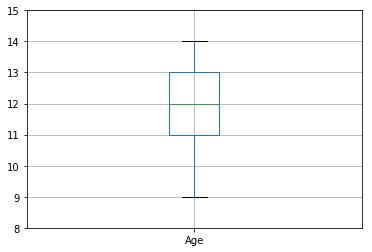

In [59]:
%matplotlib inline
import matplotlib as mp
from matplotlib import pyplot as plt
print(df.describe())
plt.ylim(8,15)
df.boxplot()


## Histogram
Good for looking at how many items fall within a range.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac692be1d0>]],
      dtype=object)

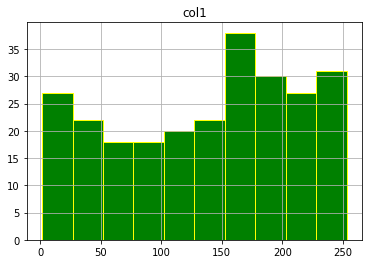

In [63]:
%matplotlib inline
import numpy as np
df = pd.DataFrame(np.random.rand(253, 1) * 254, columns=['col1'])
df.hist(histtype='bar', ec='yellow', color='green')


## Bar Chart
Useful for seeing how many items are in each category.

Female    3
Male      2
Name: Gender, dtype: int64
        Age
Gender     
Female    3
Male      2


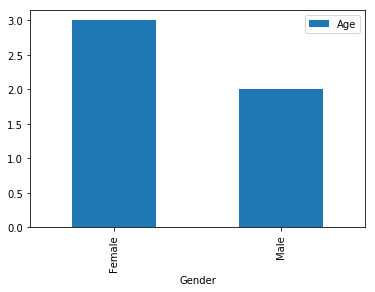

In [66]:
df = pd.DataFrame([('Male', 10),('Male', 11), ('Female', 11), ('Female', 12), ('Female', 12)], columns=['Gender','Age'])
print(df.Gender.value_counts())
x = df.groupby('Gender').count()
print(x)
x.plot(kind='bar')


## LAB 3: ## 

### Create a boxplot to compare beef, veal, and pork
### Run a histogram on the same three
<br>
<details><summary>Click for <b>hint</b></summary>
<p>
Select the three columns from meat using the [[]] syntax 
<br>
Run a boxplot method on the DataFrame of three columns
<br>
<br>
</p>
</details>


<details><summary>Click for <b>code</b></summary>
<p>

```python
%matplotlib inline
somemeat = meat[['beef', 'veal', 'pork']]
somemeat.boxplot()

somemeat.hist(histtype='bar', ec='black')

```
</p>
</details>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac68ddb470>,
      dtype=object)

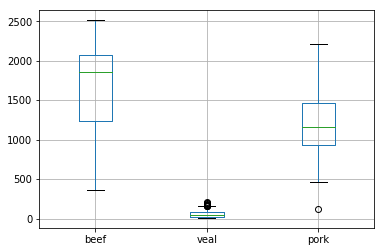

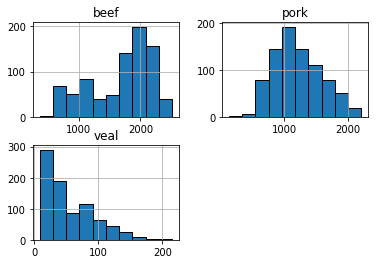

In [67]:
%matplotlib inline
somemeat = meat[['beef', 'veal', 'pork']]
somemeat.boxplot()

somemeat.hist(histtype='bar', ec='black')



## Replacing Null Values with the Central Tendency

In [110]:
import pandas as pd
fatal = pd.read_csv('2012_Workplace_Fatalities_by_State.csv')
#print(fatal.columns)
#print(fatal['Number of Fatalities, 2012'])
#display(fatal)
fatal.columns = ['State', 'NumberOfFatalities', 'RateOfFatalities', 'StateRank', 'NumberOfInjuries', 'InjuriesRate', 'PenaltiesAvg', 'PenaltiesRank', 'Inspectors', 'YearsToInspectEachWorkplaceOnce', 'StateFederal']
#display(fatal)
#print(fatal.NumberOfFatalities)
#fatal = fatal[['State', 'NumberOfFatalities', 'StateRank', 'NumberOfInjuries', 'InjuriesRate', 'PenaltiesAvg', 'PenaltiesRank', 'Inspectors', 'YearsToInspectEachWorkplaceOnce', 'StateFederal']]
#display(fatal2)
print(fatal.PenaltiesRank.mean())
print(fatal[['PenaltiesRank', 'NumberOfInjuries']].mean())
display(fatal.PenaltiesRank[48:])
display(fatal.PenaltiesRank[48:].isnull())
#fatal.PenaltiesRank = fatal.PenaltiesRank.fillna(0)
# fatal['NewCol'] = fatal.PenaltiesRank.fillna(fatal.PenaltiesRank.mean())
# display(fatal)
# fatal.PenaltiesRank = fatal.PenaltiesRank.fillna(fatal.PenaltiesRank.mean())
# display(fatal.PenaltiesRank[48:])
# display(fatal.PenaltiesRank[48:].isnull())
# print(fatal.PenaltiesRank.mean())
# display(fatal.PenaltiesRank[48:])
print(fatal.shape)
#fatal.dropna(axis = 0, inplace = True)
#fatal.fillna(fatal.PenaltiesRank.mean(), axis = 0, inplace = True)
print(fatal.shape)
display(fatal)
#print(help(fatal.fillna))

25.5
PenaltiesRank          25.500000
NumberOfInjuries    64178.571429
dtype: float64


48    10.0
49     1.0
50     NaN
51     NaN
52     NaN
53     NaN
Name: PenaltiesRank, dtype: float64

48    False
49    False
50     True
51     True
52     True
53     True
Name: PenaltiesRank, dtype: bool

(54, 11)
(54, 11)


,State,NumberOfFatalities,RateOfFatalities,StateRank,NumberOfInjuries,InjuriesRate,PenaltiesAvg,PenaltiesRank,Inspectors,YearsToInspectEachWorkplaceOnce,StateFederal
0,"South Carolina\n(33.99882060100049, -81.045367...",63.0,3.5,25.0,36200.0,3.0,492.0,49.0,24.0,111.0,State
1,"West Virginia\n(38.665511497000466, -80.712639...",49.0,6.9,46.0,19800.0,4.1,1798.0,27.0,7.0,173.0,Federal
2,"Massachusetts\n(42.27687306500047, -72.0826898...",44.0,1.4,1.0,69700.0,3.1,1929.0,21.0,33.0,123.0,Federal
3,"Tennessee\n(35.680943063000484, -85.7744864219...",101.0,3.8,30.0,65100.0,3.5,727.0,45.0,30.0,82.0,State
4,"Oklahoma\n(35.472034350000456, -97.52106845499...",97.0,6.1,42.0,39000.0,3.6,1872.0,24.0,19.0,131.0,Federal
5,"Illinois\n(40.48501278700047, -88.99770813999965)",146.0,2.5,10.0,124900.0,3.2,1876.0,23.0,74.0,137.0,Federal
6,"Nebraska\n(41.64104043900045, -99.36571864599966)",48.0,5.2,38.0,24300.0,3.9,2565.0,5.0,9.0,128.0,Federal
7,"Delaware\n(39.00883351400046, -75.57773943699965)",14.0,3.1,18.0,7900.0,2.8,2406.0,6.0,5.0,175.0,Federal
8,"Hawaii\n(21.30485166200043, -157.85774691599974)",20.0,3.4,22.0,13700.0,3.8,964.0,39.0,20.0,79.0,State
9,"Iowa\n(42.469404401000475, -93.81648936699969)",97.0,6.6,44.0,45600.0,4.5,790.0,43.0,26.0,98.0,State


## LAB 4: ## 

### Calculate the central tendency for broilers
### Replace the null values for broilers with that central tendency
<br>
<details><summary>Click for <b>hint</b></summary>
<p>
Use mean for the central tendency
<br>
Use fillna to replace the null values for broilers. Try it with inplace False first, then True to see the different syntax
<br>
<br>
</p>
</details>


<details><summary>Click for <b>code</b></summary>
<p>

```python
meat = ps.load_meat()
broilersct = meat.broilers.mean()
print(broilersct)
display(meat)
meat2 = meat.broilers.fillna(broilersct, inplace = False)
display(meat)
display(meat2)
meat.broilers = meat2
display(meat)

meat = ps.load_meat()
meat.broilers.fillna(meat.broilers.mean(), inplace = True)
display(meat)
```
</p>
</details>

### Now suppose you want to do that for several columns. Let's use the apply function to run the fillna function on each column

In [95]:
meat = ps.load_meat()
cols = ['beef', 'veal'] #, 'pork', 'lamb_and_mutton', 'broilers', 'other_chicken', 'turkey']
print(meat[cols])
x = meat[cols].applymap(lambda x : x * 2)
print(x)

       beef   veal
0     751.0   85.0
1     713.0   77.0
2     741.0   90.0
3     650.0   89.0
4     681.0  106.0
5     658.0  125.0
6     662.0  142.0
7     787.0  175.0
8     774.0  182.0
9     834.0  215.0
10    786.0  197.0
11    764.0  146.0
12    820.0  119.0
13    816.0   97.0
14    836.0  107.0
15    736.0   98.0
16    747.0  103.0
17    739.0  110.0
18    736.0  117.0
19    858.0  145.0
20    910.0  164.0
21   1022.0  201.0
22    933.0  173.0
23    783.0  118.0
24    856.0  101.0
25    827.0   85.0
26    796.0   92.0
27    734.0   91.0
28    605.0   83.0
29    461.0   78.0
..      ...    ...
797  2320.0   10.7
798  2229.6   10.9
799  2286.6   11.2
800  2252.2   11.3
801  2234.9   11.4
802  2235.5   11.3
803  2270.9   11.7
804  2122.9   10.8
805  2020.4   10.5
806  2266.2   12.1
807  2052.5   10.2
808  2131.9   10.3
809  2375.0   11.2
810  2134.1   10.1
811  2386.9   11.4
812  2215.2   10.7
813  2215.1   10.6
814  2148.8   10.8
815  2126.3   10.8
816  2113.8   10.4
817  2009.0 

In [97]:
meat = ps.load_meat()
#print(meat.columns)
cols = ['beef', 'veal', 'pork', 'lamb_and_mutton', 'broilers', 'other_chicken', 'turkey']
meat[cols] = meat[cols].apply(lambda x : x.fillna(x.mean()), axis = 0)
display(meat)


,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,551.25,551.25,551.25
1,1944-02-01,713.0,77.0,1169.0,72.0,507.75,507.75,507.75
2,1944-03-01,741.0,90.0,1128.0,75.0,508.50,508.50,508.50
3,1944-04-01,650.0,89.0,978.0,66.0,445.75,445.75,445.75
4,1944-05-01,681.0,106.0,1029.0,78.0,473.50,473.50,473.50
5,1944-06-01,658.0,125.0,962.0,79.0,456.00,456.00,456.00
6,1944-07-01,662.0,142.0,796.0,82.0,420.50,420.50,420.50
7,1944-08-01,787.0,175.0,748.0,87.0,449.25,449.25,449.25
8,1944-09-01,774.0,182.0,678.0,91.0,431.25,431.25,431.25
9,1944-10-01,834.0,215.0,777.0,100.0,481.50,481.50,481.50


## Add and Remove Columns to a DataFrame

In [116]:
print(fatal.columns)
#display(fatal)
print(fatal.StateFederal.value_counts())
print(pd.Categorical(fatal.StateFederal).codes)
# meat['newcol'] = meat.beef + meat.veal
# display(meat)
#meat.insert(len(fatal.columns)-2, 'newcol3', meat.beef + meat.veal)
#display(meat)
#fatal.insert(11, 'ProgramType', pd.Categorical(fatal['StateFederal']).codes)
#display(fatal[['ProgramType', 'StateFederal']][:5])
fatal.drop(['StateFederal'], axis = 1, inplace=True)
print(fatal.columns)


Index(['State', 'NumberOfFatalities', 'RateOfFatalities', 'StateRank',
       'NumberOfInjuries', 'InjuriesRate', 'PenaltiesAvg', 'PenaltiesRank',
       'Inspectors', 'YearsToInspectEachWorkplaceOnce', 'StateFederal',
       'ProgramType'],
      dtype='object')
Federal    29
State      21
Name: StateFederal, dtype: int64
[ 1  0  0  1  0  0  0  0  1  1  1  0  1  0  1  1  1  0  1  0  0  0  1  0
  0  1  0  1  1  1  0  0  1  0  0  1  1  0  0  1  0  0  0  0  0  1  0  0
  0  1 -1 -1 -1 -1]
Index(['State', 'NumberOfFatalities', 'RateOfFatalities', 'StateRank',
       'NumberOfInjuries', 'InjuriesRate', 'PenaltiesAvg', 'PenaltiesRank',
       'Inspectors', 'YearsToInspectEachWorkplaceOnce', 'ProgramType'],
      dtype='object')


## Change Data Type

In [120]:
display(fatal.NumberOfFatalities[48:])
fatal.NumberOfFatalities = fatal.NumberOfFatalities.fillna(0).astype(int)
display(fatal.NumberOfFatalities[48:])
print(fatal.columns)

sql = '''select cast(coalesce(NumberOfFatalities, 0) as int) as NumberOfFatalities
, State, RateOfFatalities,StateRank
from fatal
'''
fatal2 = pysqldf(sql)
display(fatal2)

48     536
49     375
50       0
51       0
52       0
53    4628
Name: NumberOfFatalities, dtype: int64

48     536
49     375
50       0
51       0
52       0
53    4628
Name: NumberOfFatalities, dtype: int64

Index(['State', 'NumberOfFatalities', 'RateOfFatalities', 'StateRank',
       'NumberOfInjuries', 'InjuriesRate', 'PenaltiesAvg', 'PenaltiesRank',
       'Inspectors', 'YearsToInspectEachWorkplaceOnce', 'ProgramType'],
      dtype='object')


,NumberOfFatalities,State,RateOfFatalities,StateRank
0,63,"South Carolina\n(33.99882060100049, -81.045367...",3.5,25.0
1,49,"West Virginia\n(38.665511497000466, -80.712639...",6.9,46.0
2,44,"Massachusetts\n(42.27687306500047, -72.0826898...",1.4,1.0
3,101,"Tennessee\n(35.680943063000484, -85.7744864219...",3.8,30.0
4,97,"Oklahoma\n(35.472034350000456, -97.52106845499...",6.1,42.0
5,146,"Illinois\n(40.48501278700047, -88.99770813999965)",2.5,10.0
6,48,"Nebraska\n(41.64104043900045, -99.36571864599966)",5.2,38.0
7,14,"Delaware\n(39.00883351400046, -75.57773943699965)",3.1,18.0
8,20,"Hawaii\n(21.30485166200043, -157.85774691599974)",3.4,22.0
9,97,"Iowa\n(42.469404401000475, -93.81648936699969)",6.6,44.0


## Rescale Data

In [121]:
from sklearn import preprocessing as pp
x = fatal.NumberOfFatalities.astype(float)
print(x.mean(), x.std(), x.min(), x.max())
display(x[10:15])
display(pp.scale(x, with_mean = False, with_std = False)[10:15])
display(pp.scale(x, with_mean = True, with_std = False)[10:15])
display(pp.scale(x, with_mean = False, with_std = True)[10:15])
display(pp.scale(x, with_mean = True, with_std = True)[10:15])

r = pp.scale(x, with_mean = True, with_std = True)
fatal.NumberOfFatalities = r
print('rescaled', fatal.NumberOfFatalities[10:15])


171.2037037037037 624.6033421943589 0.0 4628.0


10     60.0
11    218.0
12    149.0
13     88.0
14    137.0
Name: NumberOfFatalities, dtype: float64

array([ 60., 218., 149.,  88., 137.])

array([-111.2037037,   46.7962963,  -22.2037037,  -83.2037037,
        -34.2037037])

array([0.09696297, 0.35229878, 0.24079137, 0.14221235, 0.22139877])

array([-0.17971068,  0.07562513, -0.03588228, -0.1344613 , -0.05527488])

rescaled 10   -0.179711
11    0.075625
12   -0.035882
13   -0.134461
14   -0.055275
Name: NumberOfFatalities, dtype: float64


## LAB 5: ## 

### Right after the last lab, we used the apply function to replace null values for each column with the central tendency of that column. Using a similar technique, see if you can rescale those same columns centered around the mean and std.
<br>
<details><summary>Click for <b>hint</b></summary>
<p>
Use apply and a lambda to that uses pp.scale
<br>
<br>
</p>
</details>
<details><summary>Click for <b>code</b></summary>
<p>

```python
from sklearn import preprocessing as pp
meat = ps.load_meat()
cols = ['beef', 'veal', 'pork', 'lamb_and_mutton', 'broilers', 'other_chicken', 'turkey']
meat[cols] = meat[cols].apply(lambda x : x.fillna(x.mean()))
meat[cols] = meat[cols].apply(lambda x : pp.scale(x, with_mean = True, with_std = True))

display(meat)
```
</p>
</details>

In [ ]:
from sklearn import preprocessing as pp
meat = ps.load_meat()
cols = ['beef', 'veal', 'pork', 'lamb_and_mutton', 'broilers', 'other_chicken', 'turkey']


## Sometimes a helper function can make life easier. Here's one to automatically fillna and scale all numeric columns

In [127]:
from numpy import nan as NA

def numeric_columns(df):
    is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
    return is_number(df.dtypes)
    
def apply_numeric_columns(df, func = None, with_mean = None, with_std = None, inplace = False):
    import numpy as np
    if with_mean or with_std:
        with_mean = False if with_mean is None else with_mean
        with_std = False if with_std is None else with_std
        func = lambda x : pp.scale(x, with_mean = with_mean, with_std = with_std)
    elif func is None: # default would be to replace value with the column mean
        func = lambda x : x.fillna(x.mean())
    is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
    ret = df.iloc[:, is_number(df.dtypes)].apply(func)
    if inplace:
        df.iloc[:, numeric_columns(df)] = ret
        
    return ret

df = pd.DataFrame({'a':['One', 'Two', 'Three', 'Four', 'Five'], 'b': [1, 2, 3, 4, NA], 'c':[10, 20, 30, 20, NA]})
#display(df)
print(numeric_columns(df))

# apply_numeric_columns(df, inplace = True)
# display(df)
# apply_numeric_columns(df, with_mean = True, with_std = True, inplace = True)
# display(df)

# df2 = apply_numeric_columns(df)
# df3 = apply_numeric_columns(df2, with_mean = True, with_std = True)
# display(df3)

# df.iloc[:, numeric_columns(df)]
# #print(df.mean(), df.std())
# df2 = apply_numeric_columns(df)
# display(df2)

# # Replace the numeric columns with the rescaled version
# df.iloc[:, numeric_columns(df)] = df2
# display(df)

display(apply_numeric_columns(df, func = lambda x : x.min()))


[False  True  True]


b     1.0
c    10.0
dtype: float64

## Concat Data

In [135]:
df1 = pd.DataFrame([('Male', 10),('Male', 11), ('Female', 11), ('Female', 12), ('Female', 12)], columns=['Gender','Age'])
df2 = pd.DataFrame([('Male', 20),('Male', 21), ('Female', 21), ('Female', 22)], columns=['Gender','Age'])
display(df1)
display(df2)
# df = pd.concat([df1, df2])
# display(df.loc[0])
# display(df)
df3 = pd.DataFrame([('John', 'Smith'), ('Joe','Average'), ('Jane', 'Doe'), ('Jill', 'Hill')], columns = ['First', 'Last'])
display(df3)
df = pd.concat([df1, df3], axis = 1)
display(df)




,Gender,Age
0,Male,10
1,Male,11
2,Female,11
3,Female,12
4,Female,12


,Gender,Age
0,Male,20
1,Male,21
2,Female,21
3,Female,22


,First,Last
0,John,Smith
1,Joe,Average
2,Jane,Doe
3,Jill,Hill


,Gender,Age,First,Last
0,Male,10,John,Smith
1,Male,11,Joe,Average
2,Female,11,Jane,Doe
3,Female,12,Jill,Hill
4,Female,12,NaN,NaN


,Gender,Age,First,Last,newcol
0,Male,10,John,Smith,20
1,Male,11,Joe,Average,21
2,Female,11,Jane,Doe,21
3,Female,12,Jill,Hill,22
4,Female,12,NaN,NaN,22


## Merge or Join DataFrames

In [137]:
person_data = {
        'id': ['1', '2', '3', '4', '5'],
        'first_name': ['John', 'Sue', 'Jack', 'Alice', 'Joe'], 
        'last_name': ['Smith', 'Miller', 'Sprat', 'Wonderland', 'Blow']}
df1 = pd.DataFrame(person_data, columns = ['id', 'first_name', 'last_name'])
display(df1)
skill_data = {
    'id' : ['1', '1', '2', '3', '3', '3', '5', '6'],
    'skill' : ['C++', 'Java', 'Java', 'C++', 'Java', 'Python', 'Python', 'Java']
}
df2 = pd.DataFrame(skill_data, columns = ['id', 'skill'])
display(df2)
display(pd.merge(df1, df2, on = 'id', how = 'left'))
display(pd.merge(df1, df2, how = 'left' ))



,id,first_name,last_name
0,1,John,Smith
1,2,Sue,Miller
2,3,Jack,Sprat
3,4,Alice,Wonderland
4,5,Joe,Blow


,id,skill
0,1,C++
1,1,Java
2,2,Java
3,3,C++
4,3,Java
5,3,Python
6,5,Python
7,6,Java


,id,first_name,last_name,skill
0,1,John,Smith,C++
1,1,John,Smith,Java
2,2,Sue,Miller,Java
3,3,Jack,Sprat,C++
4,3,Jack,Sprat,Java
5,3,Jack,Sprat,Python
6,4,Alice,Wonderland,NaN
7,5,Joe,Blow,Python


,id,first_name,last_name,skill
0,1,John,Smith,C++
1,1,John,Smith,Java
2,2,Sue,Miller,Java
3,3,Jack,Sprat,C++
4,3,Jack,Sprat,Java
5,3,Jack,Sprat,Python
6,4,Alice,Wonderland,NaN
7,5,Joe,Blow,Python


## Convert Categorical Data

In [139]:
person_data = { 'id': ['1', '2', '3', '4', '5'],       
     'first_name': ['John', 'Sue', 'Jack', 'Alice', 'Joe'],        
     'status': ['Active', 'Active', 'Pending', 'Cancelled', 'Cancelled']}
df1 = pd.DataFrame(person_data, columns = ['id', 'first_name', 'status'])
display(df1)
df1.status = pd.Categorical(df1.status).codes
display(df1)

,id,first_name,status
0,1,John,Active
1,2,Sue,Active
2,3,Jack,Pending
3,4,Alice,Cancelled
4,5,Joe,Cancelled


,id,first_name,status
0,1,John,0
1,2,Sue,0
2,3,Jack,2
3,4,Alice,1
4,5,Joe,1


## Dummy Encoded

In [146]:
person_data = { 'id': ['1', '2', '3', '4', '5'],       
     'first_name': ['John', 'Sue', 'Jack', 'Alice', 'Joe'],        
     'status': ['Active', 'Active', 'Pending', 'Cancelled', 'Cancelled']}
df1 = pd.DataFrame(person_data, columns = ['id', 'first_name', 'status'])
display(df1)

dummies = pd.get_dummies(df1.status, drop_first = True)
#display(dummies)
#display(pd.concat([df1, dummies]))

df2 = pd.concat([df1[['id','first_name']], dummies], axis = 1)
display(df2)

dummies = pd.get_dummies(df1.status, drop_first = False)
df3 = pd.concat([df1[['id','first_name']], dummies], axis = 1)
display(df3)



,id,first_name,status
0,1,John,Active
1,2,Sue,Active
2,3,Jack,Pending
3,4,Alice,Cancelled
4,5,Joe,Cancelled


,id,first_name,Cancelled,Pending
0,1,John,0,0
1,2,Sue,0,0
2,3,Jack,0,1
3,4,Alice,1,0
4,5,Joe,1,0


,id,first_name,Active,Cancelled,Pending
0,1,John,1,0,0
1,2,Sue,1,0,0
2,3,Jack,0,0,1
3,4,Alice,0,1,0
4,5,Joe,0,1,0


## Split Data into Train and Test Sets

In [147]:
# print ('Split 1')
# train = fatal.sample(frac=0.8,random_state=200)
# test = fatal[~fatal.index.isin(train.index)]
# x0 = fatal.ProgramType
# x1 = train.ProgramType
# x2 = test.ProgramType

# print(x0.value_counts()/x0.count())
# print(x1.value_counts()/x1.count())
# print(x2.value_counts()/x2.count())
# print(fatal.shape, train.shape, test.shape)

from sklearn.model_selection import train_test_split
print ('Split 2')
print(fatal.shape)
train, test = train_test_split(fatal, test_size=0.2)
print(train.shape, test.shape)
x0 = fatal.ProgramType
x1 = train.ProgramType
x2 = test.ProgramType
print(x0.value_counts()/x0.count())
print(x1.value_counts()/x1.count())
print(x2.value_counts()/x2.count())
print(fatal.shape, train.shape, test.shape)


Split 2
(54, 11)
(43, 11) (11, 11)
 0    0.537037
 1    0.388889
-1    0.074074
Name: ProgramType, dtype: float64
 0    0.581395
 1    0.348837
-1    0.069767
Name: ProgramType, dtype: float64
 1    0.545455
 0    0.363636
-1    0.090909
Name: ProgramType, dtype: float64
(54, 11) (43, 11) (11, 11)


## LAB 6: ## 

### Split the meat DataFrame into a 70/30 split
<br>
<details><summary>Click for <b>hint</b></summary>
<p>
Use train_test_split, it's way easier
<br>
<br>
</p>
</details>
<details><summary>Click for <b>code</b></summary>
<p>

```python
from sklearn.model_selection import train_test_split
meatTrain, meatTest = train_test_split(meat, test_size = 0.3)
print(len(meatTrain), len(meatTest))
```
</p>
</details>

### Natural Language Processing

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

DIR = 'text'

def corpus_from_dir(folder):
    import os
    ret = dict(docs = [open(os.path.join(folder,f)).read() for f in os.listdir(folder)],
               ColNames = map(lambda x: x.split('.')[0], os.listdir(folder)))
    return ret

def tdm_df(docs, colNames = None, **kwargs):

    #initialize the  vectorizer
    vectorizer = CountVectorizer(**kwargs)
    x1 = vectorizer.fit_transform(docs)
    #create dataFrame
    df = pd.DataFrame(x1.toarray().transpose(), index = vectorizer.get_feature_names())
    if colNames is not None:
        df.columns = colNames

    return df

corpus = corpus_from_dir(DIR)
print(corpus)
df = tdm_df(docs = corpus['docs'], colNames = corpus['ColNames'], stop_words = 'english')  
print(df)


{'docs': ['avatar\n  Once upon a midnight dreary, while I pondered, weak and weary,\n  Over many a quaint and curious volume of forgotten lore--\n  While I nodded, nearly napping, suddenly there came a tapping,\n  As of some one gently rapping, rapping at my chamber door.\n  "\'Tis some visitor," I muttered, "tapping at my chamber door--\n                                     Only this and nothing more."\n\navatar\n\n', 'THE thousand injuries of Fortunato I had borne as I best could; but\nwhen he ventured upon insult, I vowed revenge. You, who so well know the\nnature of my soul, will not suppose, however, that I gave utterance to\na threat. _At length_ I would be avenged; this was a point definitively\nsettled--but the very definitiveness with which it was resolved,\nprecluded the idea of risk. I must not only punish, but punish with\nimpunity. A wrong is unredressed when retribution overtakes its\nredresser. It is equally unredressed when the avenger fails to make\nhimself felt as suc

ValueError: Shape of passed values is (3, 103), indices imply (103, 103)

## Homework: ## 

### Load the sales.csv file found in Day4
### Replace the nulls with the means and rescale the numeric columns 
### Add a column for a numeric encoded version of color
### Add a series of dummy coded columns for color
<br>
<details><summary>Click for <b>hint</b></summary>
<p>
Import the correct package to do rescaling
<br>
Remember to add a new column you can't use property or dot syntax to refer to a column
<br>
Remember to add Dummy Coded values you are adding more than one column so you need another method to add them to the DataFrame
<br>
<br>
</p>
</details>
